# Text Classification on BBC Dataset

### Data Description
BBC dataset contains 2225 news documents with five different categories. News articles are text files in separate folders.

### Concepts Covered
- EDA (Exploratory Data Analysis)


- Preprocessing
    - Tokenization
    - Label Encoding
    - Stemming & Lemmatization
    - Stopwords & Punctuation
    - Noise Removal


- Vectorization
    - Bag of Words
    - TF-IDF 


- Models
    - Logistic Regression
    - Support Vector Machine
    - Random Forest


- Save & Load Model

# Import Libraries

In [146]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from nltk.corpus import stopwords
from string import punctuation

import nltk
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load Data

In [35]:
data_dir = r"U:\Study\dataset\Clustering\bbc-fulltext\bbc"

data = []

for root, dirs, files in os.walk(data_dir):
    for d in dirs:
        class_dir = root + os.sep + d
        
        for path in os.listdir(class_dir):
            try:
                with open(class_dir + os.sep + path, 'r') as file:
                    text = file.read()
                    data.append((text, d))
            except:
                print(f"Error while reading data from file: {class_dir + os.sep + path}")

                
df = pd.DataFrame(data, columns=['Text', 'Label'])

# 2. EDA (Exploratory Data Analysis)

In [36]:
df.head()

,Text,Label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


If we check the files in text editor then we can see that first line contains the news title.

In [37]:
# Number of Instances
df.shape

(2225, 2)

### Category wise count

In [38]:
df['Label'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Label, dtype: int64

[]

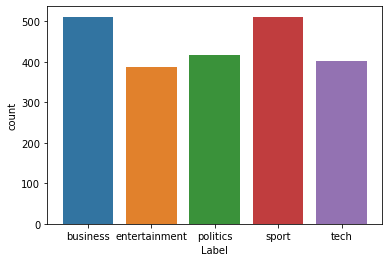

In [39]:
sns.countplot(x='Label', data=df)
plt.plot()

#### Observation:
We have almost all class count neary equal, we can say that our dataset is balanced.

Further analysis like unique words and most frequent words. We will do it after preprocessing.

# 2. Preprocessing

### 2.1 Tokenization
There are multiple ways to tokenize text. Simplest way is to split by whitespace. However, spliting by whitespace doesn't give proper tokens. 
Here, we will use NLTK library to tokenize text in to sentence, then in to the words. This way, we will get proper words.

In [115]:
preprocessd_data = []

for idx, row in df.iterrows():
    text = row['Text'].lower()
    words =[]
    
    for sentence in nltk.sent_tokenize(text):
        words.extend(nltk.word_tokenize(sentence))
        
    preprocessd_data.append(words)

### 2.2 Stemming & Lemmatization

Lemmatization transforms word into the root form. For example, playing, played, plays become play. Stemming also does the same thing almost, but it literally transforms the word based on rules even if word doesn't exists in the language. Lemmatization solves this issue by using the language knowledge. That's why we are using Lemmatization here instead of stemming.

In [134]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_data = []

for words in preprocessd_data:
    lemmatized_data.append([wordnet_lemmatizer.lemmatize(word) for word in words])

### 2.3 Label Encoding

Our labels are in string. Machine Learning algorithms need data in numerical format. So, we will transform our labels in to the numbers. For example, sports to 0, business to 1 and so on. To do this, we will use LabelEncoder from sklearn library. 

fit_transform funcation creates number of integers as per the labels and also converts existing labels into the numbers and returns it.

In [135]:
label_encoder = LabelEncoder()
new_labels = label_encoder.fit_transform(df['Label'])

label_encoder.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [136]:
df_2['Label'].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: Label, dtype: int64

## Word Analysis

Before moving to stopwords and noise removal, let's analyse the unique words and most frequent words.

In [137]:
word_counter = Counter(w for l1 in lemmatized_data for w in set(l1))

In [138]:
# Unique Words
len(word_counter.keys())

31756

In [139]:
# Most Frequent Words
word_counter.most_common(100)

[(',', 2225),
 ('.', 2225),
 ('the', 2225),
 ('a', 2216),
 ('to', 2214),
 ('of', 2207),
 ('and', 2205),
 ('in', 2204),
 ('for', 2083),
 ("'s", 2063),
 ('on', 2015),
 ('it', 1986),
 ('is', 1923),
 ('``', 1922),
 ("''", 1919),
 ('said', 1888),
 ('that', 1848),
 ('with', 1838),
 ('ha', 1830),
 ('at', 1769),
 ('wa', 1754),
 ('be', 1729),
 ('by', 1709),
 ('have', 1668),
 ('but', 1629),
 ('from', 1565),
 ('will', 1470),
 ('are', 1459),
 ('an', 1425),
 ('he', 1406),
 ('not', 1386),
 ('which', 1345),
 ('this', 1343),
 ('year', 1320),
 ('been', 1316),
 ('also', 1265),
 ('had', 1213),
 ('would', 1156),
 ('they', 1152),
 ('up', 1135),
 ('their', 1126),
 ('were', 1121),
 ('more', 1108),
 ('-', 1093),
 ('who', 1092),
 ('one', 1042),
 ('we', 1021),
 ('his', 1013),
 ('out', 1008),
 ('after', 1006),
 ('about', 981),
 ('new', 978),
 ('there', 960),
 ('than', 958),
 ('over', 922),
 ('last', 908),
 ('(', 906),
 (')', 906),
 ('all', 896),
 ('could', 893),
 ('i', 893),
 (':', 882),
 ('time', 880),
 ('or', 

We can notice that there is a lots of noise in the data. Most common words are like and, of, the, etc. So, we need to remove this kind of data because it's not useful. This kind of words are called stopwords and we can use nltk to deal with that. Other characters like ',', '(', '-' are called punctuations and we can use string module for that. Regular expressions are also used to remove noise like URLs, digits, specific type of pattern.

### 2.4 Stopwords & Punctuation

In [144]:
filtered_data = []

stop_words = stopwords.words('english')

for words in lemmatized_data:
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word not in punctuation:
            filtered_words.append(word)
    
    filtered_data.append(filtered_words)

In [145]:
word_counter_2 = Counter(w for l1 in filtered_data for w in set(l1))

# Unique Words
print("Unique words after filtering:", len(word_counter_2.keys()))

# Most Common Words After Filtering
word_counter_2.most_common(100)

Unique words after filtering: 31606


[("'s", 2063),
 ('``', 1922),
 ("''", 1919),
 ('said', 1888),
 ('ha', 1830),
 ('wa', 1754),
 ('year', 1320),
 ('also', 1265),
 ('would', 1156),
 ('one', 1042),
 ('new', 978),
 ('last', 908),
 ('could', 893),
 ('time', 880),
 ('u', 835),
 ('two', 814),
 ('people', 797),
 ('mr', 795),
 ('first', 781),
 ('make', 703),
 ('say', 680),
 ('world', 666),
 ('made', 648),
 ('take', 632),
 ("n't", 628),
 ('told', 617),
 ('get', 615),
 ('way', 585),
 ('back', 580),
 ('month', 578),
 ('added', 577),
 ('week', 563),
 ('three', 559),
 ('number', 547),
 ('like', 545),
 ('next', 543),
 ('company', 535),
 ('well', 534),
 ('many', 527),
 ('uk', 524),
 ('set', 516),
 ('go', 500),
 ('want', 497),
 ('since', 490),
 ('come', 488),
 ('government', 479),
 ('still', 476),
 ('bbc', 475),
 ('day', 471),
 ('may', 468),
 ('see', 467),
 ('firm', 464),
 ('part', 461),
 ('good', 460),
 ('much', 451),
 ('work', 450),
 ('game', 444),
 ('going', 441),
 ('country', 440),
 ('second', 424),
 ('end', 423),
 ('need', 419),
 (

Here, we can see that our result is improved but still there are certain words with punctuation and digits like 's, n't, 2004, etc. We can remove it by using regular expressions.

### 2.5 Noise Removal

We will remove word if it contains any other character than alphabets.

In [171]:
clean_data = []

noise_clean = re.compile(r"[^a-z]")

for words in filtered_data:
    clean_words = []
    
    for word in words:
        if noise_clean.search(word) is None:
            clean_words.append(word)
    
    clean_data.append(clean_words)

In [172]:
word_counter_3 = Counter(w for l1 in clean_data for w in set(l1))

# Unique Words
print("Unique words after cleaning noise:", len(word_counter_3.keys()))

# Most Common Words After Filtering
word_counter_3.most_common(100)

Unique words after cleaning noise: 24228


[('said', 1888),
 ('ha', 1830),
 ('wa', 1754),
 ('year', 1320),
 ('also', 1265),
 ('would', 1156),
 ('one', 1042),
 ('new', 978),
 ('last', 908),
 ('could', 893),
 ('time', 880),
 ('u', 835),
 ('two', 814),
 ('people', 797),
 ('mr', 795),
 ('first', 781),
 ('make', 703),
 ('say', 680),
 ('world', 666),
 ('made', 648),
 ('take', 632),
 ('told', 617),
 ('get', 615),
 ('way', 585),
 ('back', 580),
 ('month', 578),
 ('added', 577),
 ('week', 563),
 ('three', 559),
 ('number', 547),
 ('like', 545),
 ('next', 543),
 ('company', 535),
 ('well', 534),
 ('many', 527),
 ('uk', 524),
 ('set', 516),
 ('go', 500),
 ('want', 497),
 ('since', 490),
 ('come', 488),
 ('government', 479),
 ('still', 476),
 ('bbc', 475),
 ('day', 471),
 ('may', 468),
 ('see', 467),
 ('firm', 464),
 ('part', 461),
 ('good', 460),
 ('much', 451),
 ('work', 450),
 ('game', 444),
 ('going', 441),
 ('country', 440),
 ('second', 424),
 ('end', 423),
 ('need', 419),
 ('however', 417),
 ('home', 412),
 ('win', 412),
 ('right', 4